In [1]:
# Importing the necessary libraries.
import numpy as np
import keras
import keras.backend as k
import datetime
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Constructing the layers of CNN model.
# Input shape of 150x150 pixels.

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))  # input: rgb values
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model. 
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# Augmenting the images of training set.
train_datagen = ImageDataGenerator(rescale=1./255,  # normalizing the images
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Rescaling the RGB values of the test set images.
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading and preprocessing the images of dataset.
training_set = train_datagen.flow_from_directory(
        r'E:\Projects\Face and face mask recognition model\train',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'E:\Projects\Face and face mask recognition model\test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [6]:
# Creating the checkpoint i.e. which model is to be saved.
model_path = r"E:\Projects\Face and face mask recognition model\model_final.h5"

checkpoint = ModelCheckpoint(model_path, 
                             monitor = 'val_accuracy', 
                             verbose = 1,
                             save_best_only = True, 
                             mode = 'max')

callbacks_list = [checkpoint]

In [7]:
# Training the model for 10 iterations (epochs) over 83 batches of data (each batch has 16 images).
model_saved=model.fit_generator(training_set,
                                epochs=10,
                                validation_data=test_set,
                                callbacks = callbacks_list)

model.save(r'E:\Projects\Face and face mask recognition model\model_final.h5',model_saved)

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 0.2404 - accuracy: 0.9209
Epoch 00001: val_accuracy improved from -inf to 0.93814, saving model to C:\Users\Asus\Desktop\model.h5
83/83 [==============================] - 50s 604ms/step - loss: 0.2404 - accuracy: 0.9209 - val_loss: 0.1721 - val_accuracy: 0.9381
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9536
Epoch 00002: val_accuracy improved from 0.93814 to 0.95361, saving model to C:\Users\Asus\Desktop\model.h5
83/83 [==============================] - 53s 637ms/step - loss: 0.1356 - accuracy: 0.9536 - val_loss: 0.1230 - val_accuracy: 0.9536
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9551
Epoch 00003: val_accuracy improved from 0.95361 to 0.97423, saving model to C:\Users\Asus\Desktop\model.h5
83/83 [==============================] - 50s 598ms/step - loss: 0.1261 - accuracy: 0.9551 - val_loss: 0.0877 - val_accuracy: 0.9742
Epoc

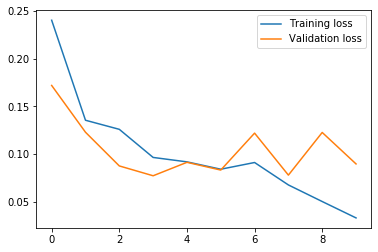

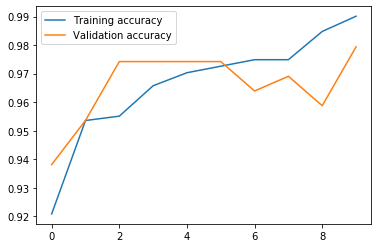

In [8]:
# Plotting the loss.
plt.plot(model_saved.history['loss'], label='Training loss')
plt.plot(model_saved.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plotting the accuracy.
plt.plot(model_saved.history['accuracy'], label='Training accuracy')
plt.plot(model_saved.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()